<a href="https://colab.research.google.com/github/hashini-fernando/Gold-Price-Prediction/blob/main/Gold_Price__prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [162]:
data = pd.read_csv('/content/gld_price_data.csv')

In [163]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


##Fearures


*   SPX - The S&P 500-to-gold ratio indicates how many ounces of gold are required to purchase the S&P 500 index (US 500) at any given time
*   GLD - GLD stands for Gold London Delivery and it refers to a system or standard in terms of classifying gold bars or bullions into its specific size, weight, and corresponding identification details such as its registry or serial numbers.
*   USO - United States Oil Fund, which tracks the price of crude oil.While "USO" may not be directly related to gold, it could still be relevant in a broader economic context. Changes in oil prices can impact inflation rates, currency values, and overall market sentiment, all of which can indirectly influence the price of gold. (Economic Indicator)
*   SLV - represents the price of this ETF, which serves as a proxy for the price of silver.(Silver Trust)





In [164]:
#check for the null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [165]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


### Data Preprocessing

In [166]:
#check null  values
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [167]:
# Select numerical columns for correlation calculation
data.drop(columns=['Date'] , inplace = True)

In [168]:
data.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


<Axes: >

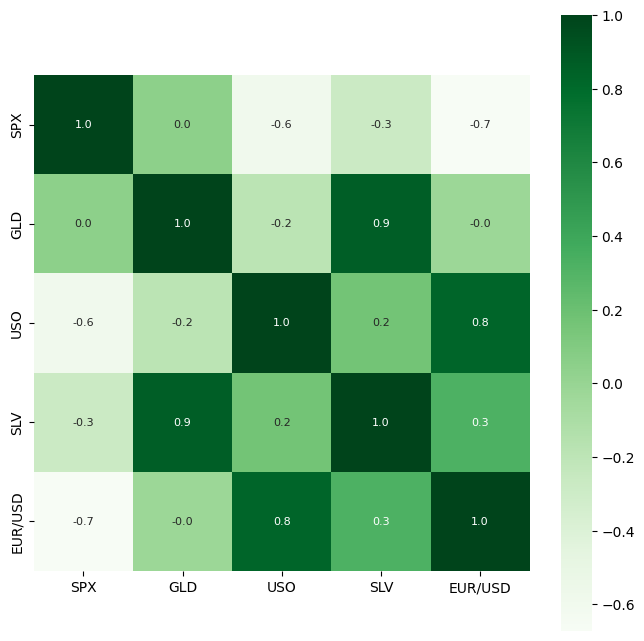

In [169]:
# check the correlation between features

correlation = data.corr()
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Greens')

In [170]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


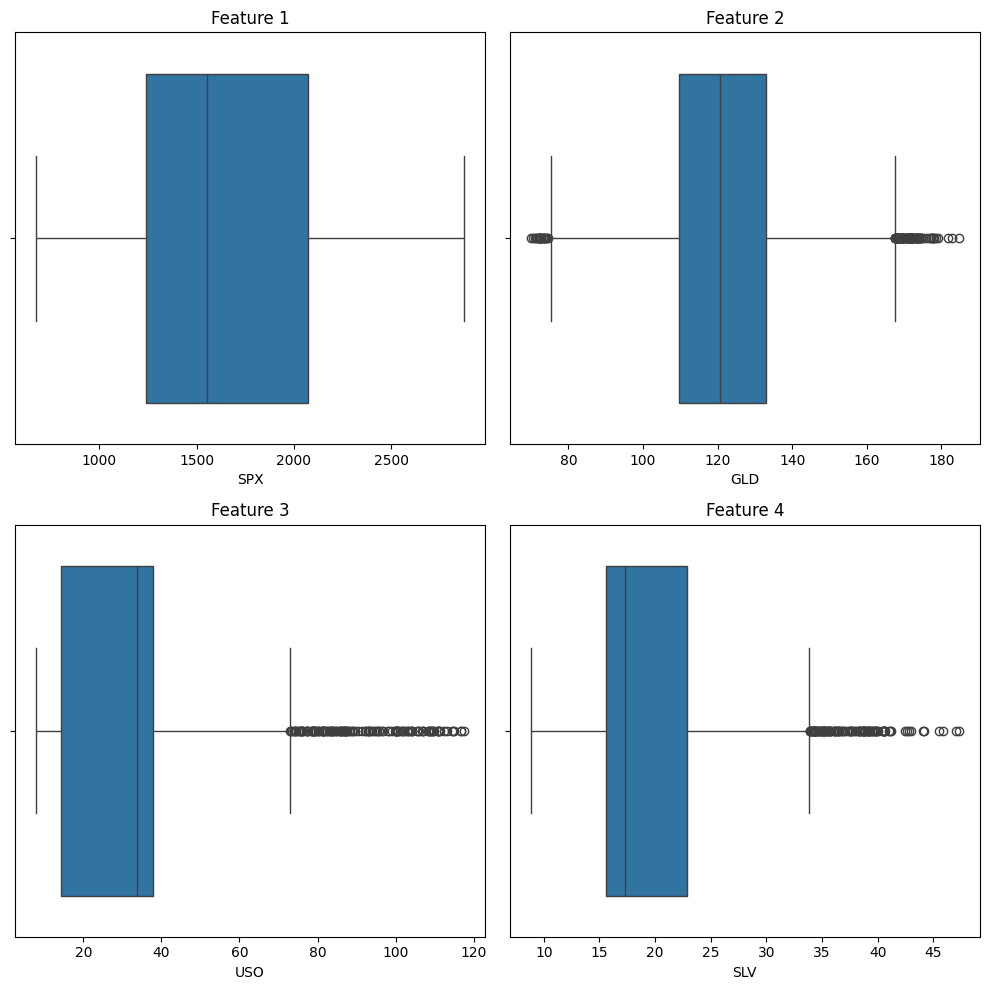

In [171]:
plt.figure(figsize=(10, 10))
for i, column in enumerate(data.columns[0:4], start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[column])
    plt.title('Feature ' + str(i))
plt.tight_layout()
plt.show()


In [172]:
# Remove outliers using Z-score (threshold: 3)
# Calculate Z-scores for all columns except the last one (assuming the last column is the target variable)
z_scores = np.abs(stats.zscore(data.iloc[:, 1:4]))


In [173]:
# Print Z-scores to check
print("Z-scores:")
print(z_scores)


Z-scores:
           GLD       USO       SLV
0     1.626963  2.388810  0.691720
1     1.596463  2.383687  0.676912
2     1.615365  2.329381  0.693553
3     1.630830  2.236652  0.709630
4     1.544483  2.265342  0.633900
...        ...       ...       ...
2285  0.079779  0.911009  0.645182
2286  0.068610  0.895128  0.642361
2287  0.105125  0.893078  0.612747
2288  0.075483  0.894615  0.638131
2289  0.008122  0.893293  0.653051

[2290 rows x 3 columns]


In [174]:
# Filter out rows where all Z-scores are less than 3
filtered_entries = (z_scores <2).all(axis=1)

# Print filtered entries to check
print("Filtered entries:")
print(filtered_entries)

Filtered entries:
0       False
1       False
2       False
3       False
4       False
        ...  
2285     True
2286     True
2287     True
2288     True
2289     True
Length: 2290, dtype: bool


In [175]:
# Keep only the rows where all Z-scores are less than 3
data = data[filtered_entries]

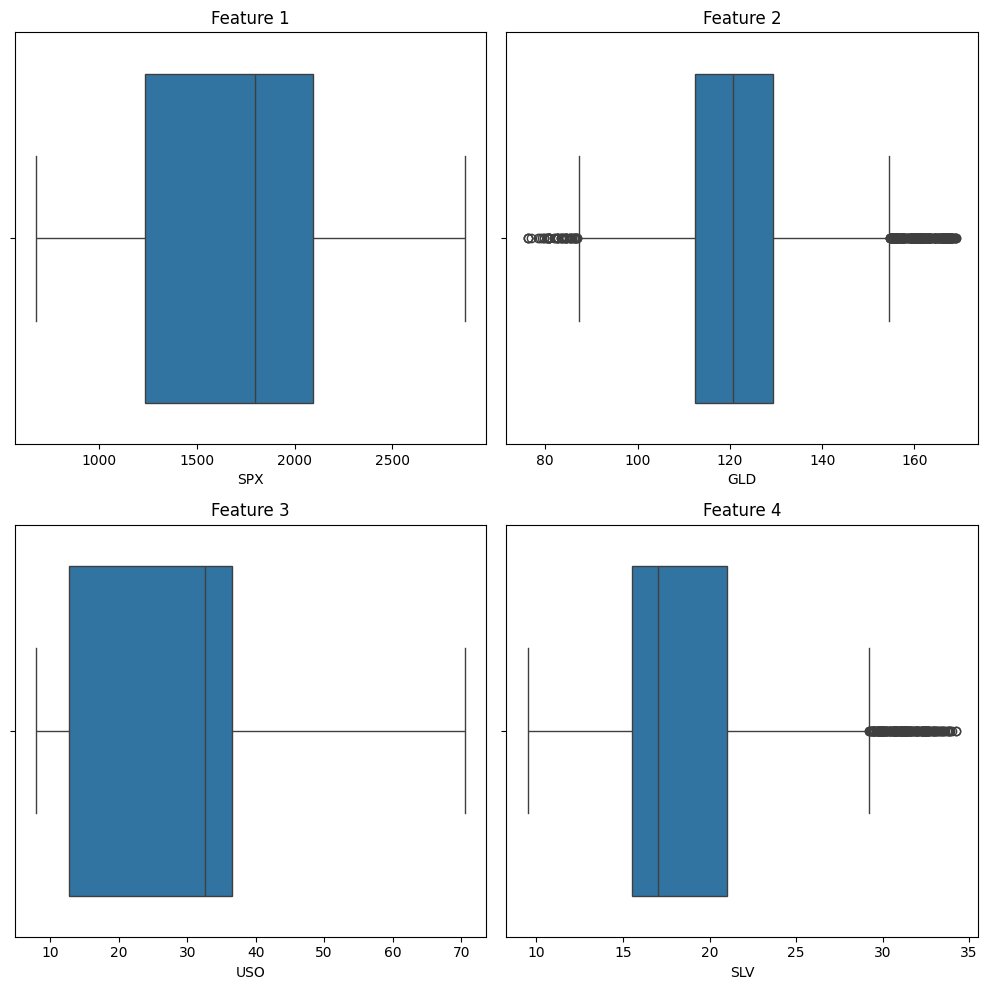

In [176]:
plt.figure(figsize=(10, 10))
for i, column in enumerate(data.columns[0:4], start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[column])
    plt.title('Feature ' + str(i))
plt.tight_layout()
plt.show()

In [177]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()
data[['SPX' , 'GLD' , 'USO','SLV','EUR/USD']] = scaler.fit_transform(data[['SPX' , 'GLD' , 'USO','SLV','EUR/USD']] )

In [178]:
data.head()

,SPX,GLD,USO,SLV,EUR/USD
13,-0.760980,-1.761087,3.668640,-0.576622,1.759857
14,-0.708221,-1.775221,3.580628,-0.576968,1.746382
21,-0.601540,-1.701524,3.661934,-0.452435,1.888975
23,-0.711901,-1.785821,3.635112,-0.530723,1.751471
24,-0.731033,-1.721715,3.540394,-0.494696,1.733655


In [183]:
#Spliting the data set into train and  test data sets
from sklearn.model_selection import  train_test_split

X = data.drop(columns='GLD',axis=1)
Y = data['GLD']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [184]:
print (X)

           SPX       USO       SLV   EUR/USD
13   -0.760980  3.668640 -0.576622  1.759857
14   -0.708221  3.580628 -0.576968  1.746382
21   -0.601540  3.661934 -0.452435  1.888975
23   -0.711901  3.635112 -0.530723  1.751471
24   -0.731033  3.540394 -0.494696  1.733655
...        ...       ...       ...       ...
2285  1.795124 -1.066407 -0.644518 -0.602149
2286  1.843696 -1.040423 -0.641054 -0.619710
2287  1.891160 -1.037070 -0.604681 -0.559973
2288  1.904415 -1.039585 -0.635858 -0.548376
2289  1.896248 -1.037422 -0.654183 -0.642557

[1967 rows x 4 columns]


In [185]:
X.shape

(1967, 4)

In [186]:
Y.shape

(1967,)

In [189]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

##Model Training

In [190]:
regressor = RandomForestRegressor(n_estimators=100)

In [191]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

##Model Evaluation

In [192]:
test_data_prediction = regressor.predict(X_test)

In [193]:
#R squard error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9854829258544144


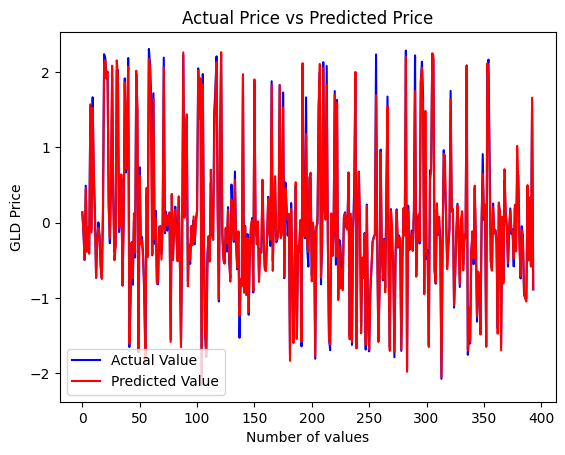

In [195]:
#Compare Actual values and predicted values by using a graph

Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='red', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()